###**CODSOFT**

**Name: Keerthana N D**


**Batch: Sept Batch A6**


**Role: Data Science**


###**TASK 1:- TITANIC SURVIVAL PREDICTION**

###*Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

###*Loading Data*

In [2]:
#read csv file
titanic = pd.read_csv('/content/tested.csv')

In [3]:
#print the dataset
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


###*Data Preprocessing*

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#describes the statistical measure of each numeric column
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#summary of dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
#datatypes of the column
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#missing null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#determine the dimension of df
titanic.shape

(418, 12)

In [10]:
#to count the unique values in a particular column
titanic['Cabin'].value_counts()


B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [11]:
titanic['Pclass'].value_counts()


3    218
1    107
2     93
Name: Pclass, dtype: int64

In [12]:
titanic['Sex'].value_counts()


male      266
female    152
Name: Sex, dtype: int64

In [13]:
titanic['Embarked'].value_counts()


S    270
C    102
Q     46
Name: Embarked, dtype: int64

###*Data Cleaning*

In [14]:
# Calculate the total count of missing values in each column and sort in descending order
missing_count = titanic.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values relative to the total count and round to one decimal place
missing_percentage_1 = titanic.isnull().sum() / titanic.isnull().count() * 100
missing_percentage_2 = (round(missing_percentage_1, 1)).sort_values(ascending=False)

# Concatenate the total missing count and missing percentage, label them as 'Total' and '%', respectively
missing_data = pd.concat([missing_count, missing_percentage_2], axis=1, keys=['Total', '%'])

# Display the first 5 rows of the missing data information
missing_data.head(5)


,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Survived,0,0.0


In [15]:
titanic.drop("Cabin",axis='columns',inplace=True)

In [16]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Fare'].fillna(titanic['Fare'].min(),inplace=True)

In [33]:
# Calculate the total count of missing values in each column and sort in descending order
missing_count = titanic.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values relative to the total count and round to one decimal place
missing_percentage_1 = titanic.isnull().sum() / titanic.isnull().count() * 100
missing_percentage_2 = (round(missing_percentage_1, 1)).sort_values(ascending=False)

# Concatenate the total missing count and missing percentage, label them as 'Total' and '%', respectively
missing_data = pd.concat([missing_count, missing_percentage_2], axis=1, keys=['Total', '%'])

# Display the first 5 rows of the missing data information
missing_data.head(8)

,Total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [18]:
titanic.drop(['Ticket'],axis='columns',inplace=True)

In [19]:
titanic.shape

(418, 10)

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


###*Exploratory Data Analysis*

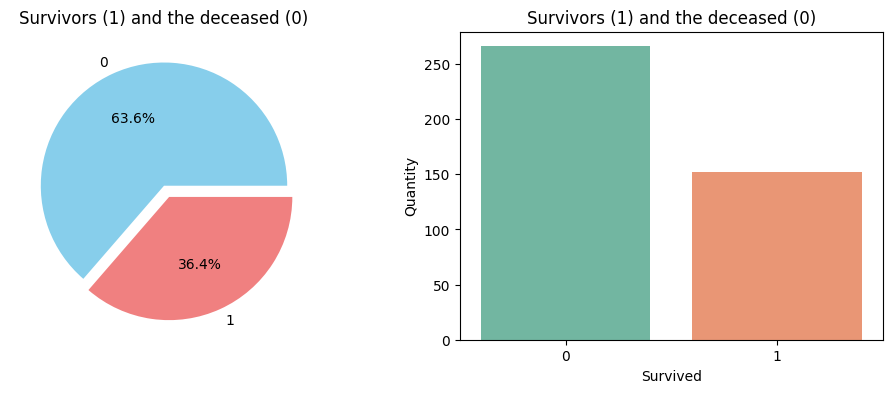

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (1 row, 2 columns) using different variable names
my_figure, my_axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot a pie chart for 'Survived' column on the first subplot
titanic['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=my_axes[0], shadow=False, colors=['skyblue', 'lightcoral']
)
my_axes[0].set_title('Survivors (1) and the deceased (0)')
my_axes[0].set_ylabel('')

# Plot a countplot for 'Survived' column on the second subplot using Seaborn
sns.countplot(x='Survived', data=titanic, ax=my_axes[1], palette='Set2')
my_axes[1].set_ylabel('Quantity')
my_axes[1].set_title('Survivors (1) and the deceased (0)')

# Show the plots
plt.show()


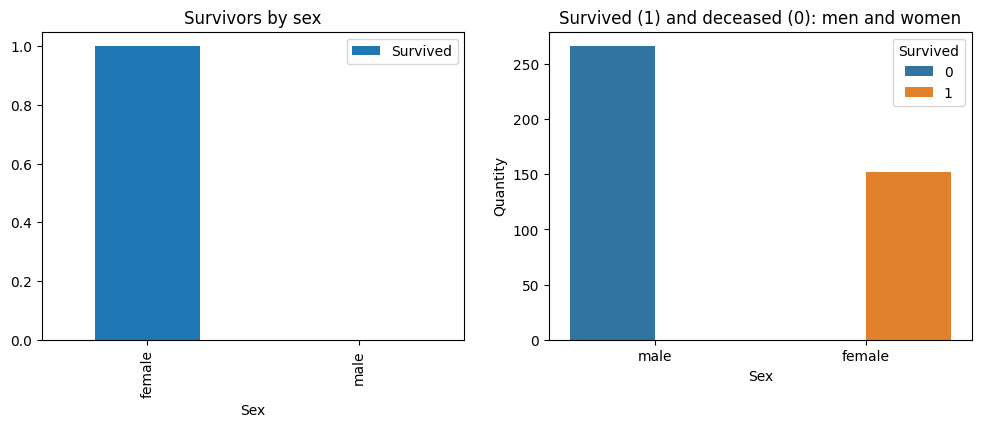

In [22]:
# Create a figure with two subplots (1 row, 2 columns) using different variable names
my_figure, my_axes = plt.subplots(1, 2, figsize=(12, 4))

# Create a bar plot showing the survival rate by sex on the first subplot
titanic[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=my_axes[0])
my_axes[0].set_title('Survivors by sex')

# Create a countplot for 'Sex' with hue 'Survived' on the second subplot using Seaborn
sns.countplot(x='Sex', hue='Survived', data=titanic, ax=my_axes[1])
my_axes[1].set_ylabel('Quantity')
my_axes[1].set_title('Survived (1) and deceased (0): men and women')

# Show the plots
plt.show()


Text(0.5, 1.0, 'Survived vs Sex')

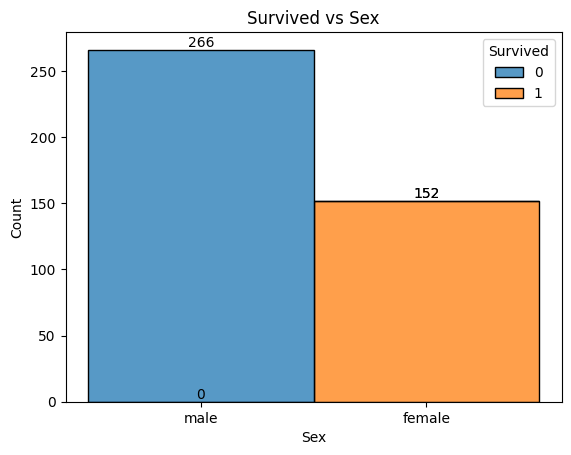

In [23]:
my_axes= sns.histplot(data=titanic,x ='Sex',hue='Survived',multiple='stack')
for i in my_axes.containers:
    my_axes.bar_label(i,)
plt.title("Survived vs Sex")

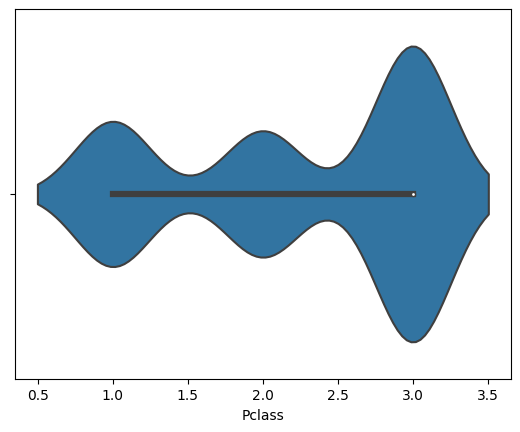

In [24]:
my_axes=sns.violinplot(data=titanic,x='Pclass',hue='Survived',multiple='stack')
for i in my_axes.containers:
    my_axes.bar_label(i,)


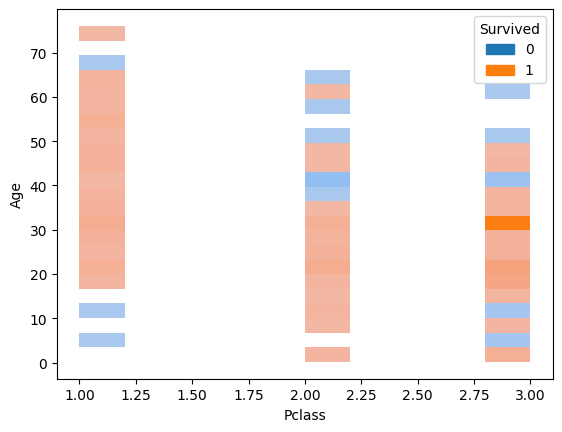

In [25]:
ax=sns.histplot(data=titanic,x='Pclass',y='Age' ,hue='Survived')
for i in ax.containers:
    ax.bar_label(i,)

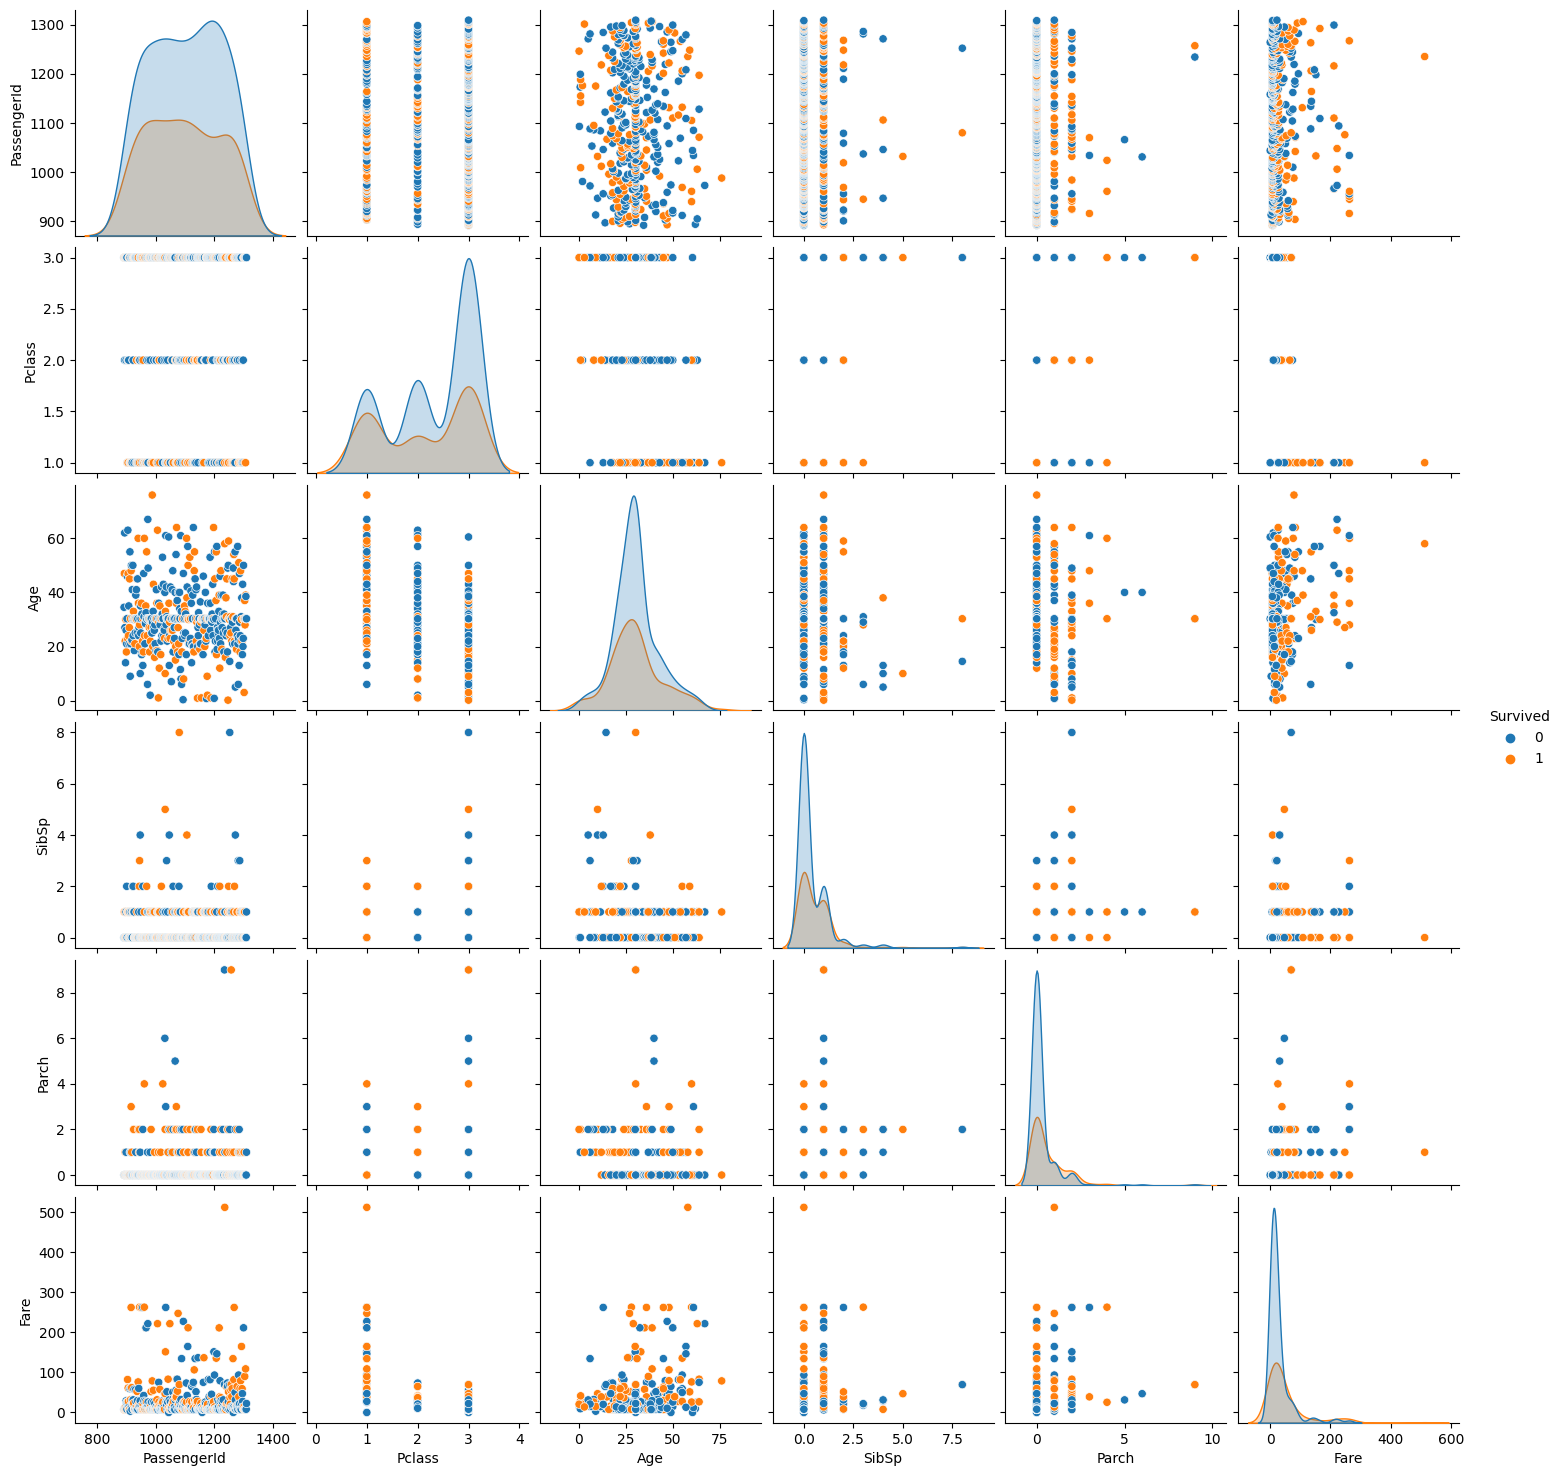

In [26]:
sns.pairplot(data=titanic,hue='Survived')
plt.show()

###*Model Traning*

In [27]:
X=titanic.drop(['Survived','Sex','Name','Embarked'],axis=1)
Y=titanic['Survived']

In [28]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [29]:
X_train


,PassengerId,Pclass,Age,SibSp,Parch,Fare
20,912,1,55.00000,1,0,59.4000
306,1198,1,30.00000,1,2,151.5500
142,1034,1,61.00000,1,3,262.3750
14,906,1,47.00000,1,0,61.1750
284,1176,3,2.00000,1,1,20.2125
...,...,...,...,...,...,...
323,1215,1,33.00000,0,0,26.5500
192,1084,3,11.50000,1,1,14.5000
117,1009,3,1.00000,1,1,16.7000
47,939,3,30.27259,0,0,7.7500


In [30]:
Y_test

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64

In [31]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on your training data
model.fit(X_train, Y_train)

LogisticRegression()

###*Model Evaluation*

In [32]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(Y_test, y_pred))


Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.56      0.98      0.71        45
           1       0.80      0.10      0.18        39

    accuracy                           0.57        84
   macro avg       0.68      0.54      0.45        84
weighted avg       0.67      0.57      0.46        84



###*Conclusion*

**Objective:**The objective is to predict whether passengers on the Titanic survived based on their attributes.

**Import Libraries:**The project begins by importing essential libraries like Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn for data manipulation, visualization, and machine learning.

**Loading Data:**The Titanic dataset is loaded into a Pandas DataFrame for analysis and modeling.

**Data Preprocessing:** Data preprocessing involves handling missing values, encoding categorical variables, creating new features, and dropping unnecessary columns to prepare the data.

**Data Cleaning:**Data cleaning addresses data quality issues such as handling missing values and outliers.

**Exploratory Data Analysis (EDA):**EDA includes visualizing data through plots and summarizing statistics to understand the dataset.
It helps in analyzing feature distributions, relationships, and correlations with the target variable.

**Model Training:**The data is split into training and testing sets for model training and evaluation.
Machine learning models like logistic regression, decision trees, or random forests are chosen and trained on the training data.


**Model Evaluation:**Model performance is assessed using metrics such as accuracy, precision, recall, F1-score.